PROJET : ANALYSE D’UNE CAMPAGNE MARKETING AVEC PANDAS 

A travers ce projet, nous serons entraîné à traduire les questions commerciales courantes en résultats mesurables, notamment : 
"Comment une campagne marketing a-t-elle fonctionné ?", 
"Quel canal d'acquisition réfère le plus d'abonnés ?", 
"Pourquoi un canal particulier est-il sous performant ?" 
Nous utiliserons les données marketing d'une entreprise d'abonnement en ligne.

LIBRAIRIES 

In [620]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

DONNEES 

In [621]:
# Importation des données 
import pandas as pd

url = "https://raw.githubusercontent.com/JerryKumako/Projets-Machine-Learning/refs/heads/main/marketing.csv"

df = pd.read_csv(url)

Les variables date_served, date_subscribed et date_canceled sont des dates et ne sont pas au bon format. Nous mettrons ces variables au format 'Datetime'. 

Résumé statiqtique

In [622]:
# Affichage des données 

print(df.info())

print('\n')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None




,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [623]:
# Résumé statistique 
df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


**En utilisant les données, répondons à des questions très importantes pour l'entreprise.**

**Cannaux Marketing utilisés par l'entreprise**

In [624]:
df['marketing_channel'].value_counts()

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

**Pour avoir plutôt les proportions :** 

In [625]:
df['marketing_channel'].value_counts(normalize = True) 

marketing_channel
House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: proportion, dtype: float64

**L'entreprise utilise majoritairement (un peu plus de 47%) les annonces auto-promotionnelle.**

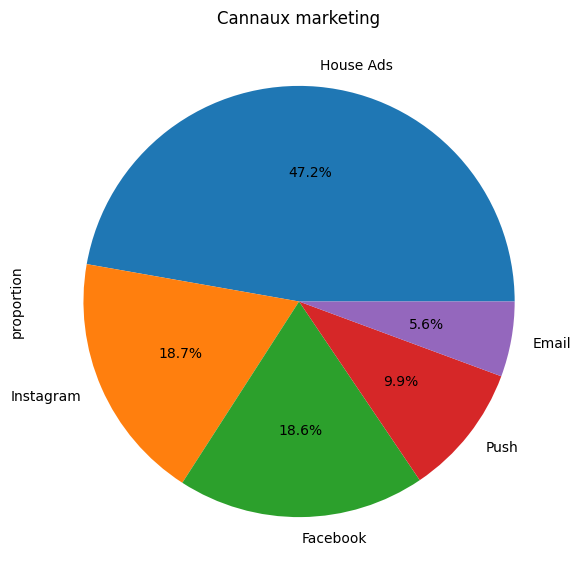

In [626]:
# Canaux marketing 

plt.figure(figsize=(7, 7))

df['marketing_channel'].value_counts(normalize = True).plot(kind = 'pie',autopct='%1.1f%%')  # Afficher les pourcentages

plt.title("Cannaux marketing")

plt.savefig('graph1.png')  # Enregistrer l'image

plt.show()
plt.close()

**Variables de dates au format datatime**

In [627]:
# Changement du type de certaines colonnes
cols_to_convert = ['date_served', 'date_subscribed', 'date_canceled']
for col in cols_to_convert:
    df[col] = pd.to_datetime(df[col])

C:\Users\User\AppData\Local\Temp\ipykernel_9976\1572969475.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\User\AppData\Local\Temp\ipykernel_9976\1572969475.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\User\AppData\Local\Temp\ipykernel_9976\1572969475.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [628]:
# Vérification 

df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

**Les variables date_served, date_subscribed et date_canceled sont maintenant dans un bon format('datetime').**

**Quel est le nombre d'utilisateurs retenus par la campagne marketing?**

In [629]:
# Nombre d'utilisateurs retenus

df['is_retained'].sum()

1279

**1279** utilisateurs ont été retenus par la campagne marketing. En proportion, cela équivaut à près de 0.69% de tous les utilisateurs.

In [630]:
df['is_retained'].value_counts(normalize=True)

is_retained
True     0.689116
False    0.310884
Name: proportion, dtype: float64

#### Creation de nouvelles colonnes
>- Nous allons créer une nouvelles variable par encodage des modalités de la variable **subscribing_channel**:

In [631]:
# Dictionnaire des chaînes distinctes de souscription avec leurs codes
dict_channels = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Push':4, 'Email':5}

In [632]:
# Creation de la colonne 'channel_code'
df['channel_code'] = df['subscribing_channel'].map(dict_channels)

Ajoutons une nouvelles colone **is_correct_lang** qui égale à 'Yes' si l'utilisateur a vu l'annonce marketing dans sa langue préférée et 'No' dans le cas contraire.

In [633]:
df['is_correct_lang'] = np.where(df['language_displayed']==df['language_preferred'], 'Yes', 'No')

In [634]:
# Ajout d'une colonne 'Dow' qui représente le jour de la semaine
df['DoW'] = df['date_subscribed'].dt.dayofweek

*Utilisateurs uniques qui voient les annonces marketing chaque jour*

Ceci est crucial pour comprendre l'efficacité des efforts marketing au cours du dernier mois.
Pour répondre à cette question, nous allons grouper les observations(lignes de la dataframe) par la variable **date_served** et compter le nombre d'urilisateurs(variable **user_id**).

In [635]:
daily_users = df.groupby('date_served')['user_id'].nunique()

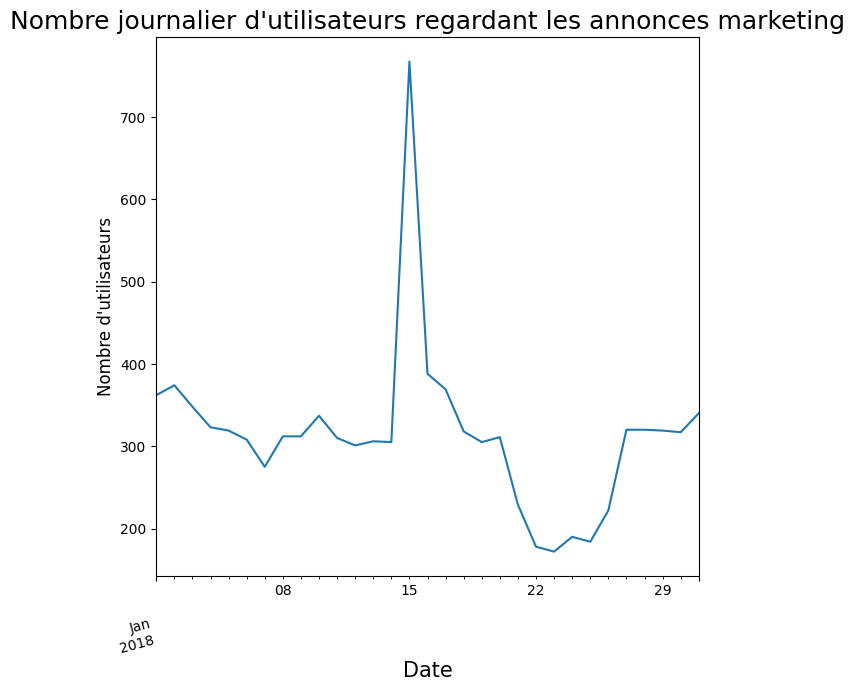

In [636]:
# Visualisation des résultats
plt.figure(figsize=(7, 7))

# Tracer la courbe
daily_users.plot.line()

# Définir l'étiquette de l'axe X avec une taille de police plus grande
plt.xlabel('Date', size=15)

# Déplacer les étiquettes de l'axe X de façon oblique (rotation de 15 degrés et alignement à droite pour les étiquettes)
plt.xticks(rotation=15, ha='right')  # rotation de 15 degrés

# Définir l'étiquette de l'axe Y
plt.ylabel("Nombre d'utilisateurs", size=12)

# Ajouter le titre du graphique avec une taille de police spécifique
plt.title("Nombre journalier d'utilisateurs regardant les annonces marketing", fontsize=18)


# Enregistrer l'image
plt.savefig('graph2.png', bbox_inches='tight')  # Enregistrer l'image avec une marge serrée

# Afficher le graphique
plt.show()

# Fermer la figure
plt.close()


Alors que la première moitié du mois enregistre entre 300 et 400 utilisateurs par jour, il y a euun énorme pic au milieu du mois. Cela peut être dû au fait que l'entreprise a déployé une grosse camapagne par mail qui a atteint plusieurs utilisateurs qui n'étaient pas des visiturs quotidiens du site.

#### Quelques indicateurs clés de performance

Une campagne marketing a t'elle réussi? il y a plusieurs manières de mesurer le succès d'une capagne. Le taux de conversion et le taux de rétention sont très souvent utilisés.

**Taux de conversion**

Parmi toutes les personnes qui sont entrées en contact avec la campagne, combien ont acheté le produit ou combien se sont abonnés au service de l'entreprise(cela dépend du type de business et de l'objectif fixé au départ)? C'est le taux de conversion qui permet de répondre à cette question. Le taux de conversion est le nombre de personnes convrties  sur le nombre total de personnes touchés par la campagne. On peut parler de conversion en termes d'achats ou en termes d'abonnement à un service par exemple. En terme d'abpnnement à un service,le taux ce conversion est le pourcentage des utilisateurs qui ont vu les annonces marketing et se sont ensuite abonnés.

**Taux de retention**

Une fois que l'utilisateur s'est abonné, l'est-il toujours après 1 mois ou 1 an? Le taux de rétention est le pourcentage de personnes qui restent abonnées après une certaine période de temps.

#### Calculons le taux de conversion global.

In [637]:
# Calcul du Taux de conversion global
    # Nonmre d'utilisateurs uniques
n_unique_users = df['user_id'].nunique()
print("Le nombre d'utilisateurs uniques est : ", n_unique_users)

    # Nombre d'utilisateurs uniques ayant souscrit au service
n_souscripteurs = df[df['converted']==True]['user_id'].nunique()
print('\n')
print("Le nombre d'utilisateurs uniques ayant souscrit au service est :", n_souscripteurs)

    # Taux de conversion
taux_conv_global = n_souscripteurs/n_unique_users
print('\n')
print("Le taux de conversion global est égal à : ", round(taux_conv_global*100, 2), "%")


Le nombre d'utilisateurs uniques est :  7309


Le nombre d'utilisateurs uniques ayant souscrit au service est : 1015


Le taux de conversion global est égal à :  13.89 %


In [638]:
# Calcul du taux de rétention global d'un mois
    # Nombre de personnes qui sont restées abonnées
retained = df[df['is_retained']==True]['user_id'].nunique()

In [639]:
# Taux de rétention
taux_retention_global = retained/n_souscripteurs
print(round(taux_retention_global*100, 2), "%")

66.8 %


#### Taux de retention par canal de souscription

In [640]:
# Nombre total d'utilisateurs retenus par canal marketing
n_retained_per_canal = df[df['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()
print(n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [641]:
# Nombre total d'utilisateurs ayant souscrit à l'abonnement via chaque canal
n_converted_per_canal = df[df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
print(n_converted_per_canal)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [642]:
# Taux de rétention par canal de souscription
taux_retention_par_canal = (n_retained_per_canal/n_converted_per_canal)*100
taux_retention_par_canal.sort_values(ascending=False)

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

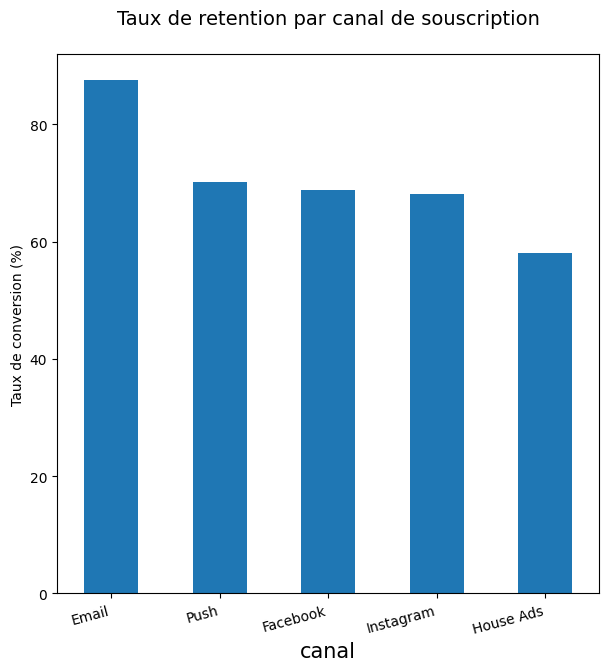

In [643]:
# Visualisation des résultats
plt.figure(figsize=(7, 7))

taux_retention_par_canal.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de retention par canal de souscription\n", fontsize=14)

plt.xlabel('canal', size = 15)

# Déplacer les étiquettes de l'axe X de façon oblique (rotation de 15 degrés et alignement à droite pour les étiquettes)
plt.xticks(rotation=15, ha='right')  # rotation de 15 degrés

plt.ylabel('Taux de conversion (%)')

plt.savefig('graph3.png')  # Enregistrer l'image
plt.show()
plt.close()

#### Automatisation du calcul de taux de retention

Puisque nous allons devoir calculer à plusieurs reprises le taux de rétention pour différents segments, définissons une fonction qui nous permettra d'automatiser ce calcul afin de ne pas recopier du code. 

In [644]:
# Fonction de calcul du taux de retention

def retention_rate(dataframe, column_names):
    
    retained = dataframe[dataframe['is_retained'] ==True].groupby(column_names)['user_id'].nunique()
    converted = dataframe[dataframe['converted'] ==True].groupby(column_names)['user_id'].nunique()

    retention_rate = retained/converted
    return retention_rate

In [645]:
# Appel de la fonction retention_rate() pour verification
retention_rate(df, ['subscribing_channel'])

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

La fonction a donné le même résultat que précédemment donc elle marche bien. Appliquons 
cette fonction pour calculer le taux de rétention selon la langue d’affichage de l’annonce. 

In [646]:
# Taux de rétention par langue affichée
taux_retention_par_langue = retention_rate(df, ['language_displayed'])
taux_retention_par_langue

language_displayed
Arabic     0.750000
English    0.668467
German     0.773585
Spanish    1.000000
Name: user_id, dtype: float64

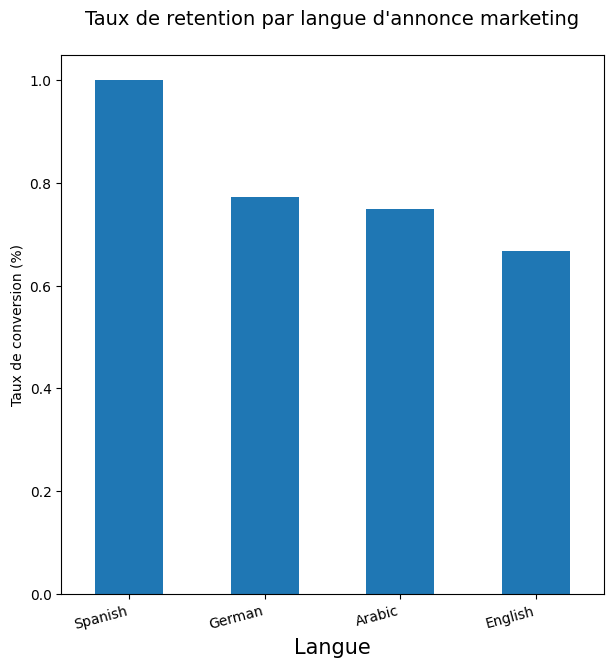

In [647]:
# Visualisation des résultats
plt.figure(figsize=(7, 7))
taux_retention_par_langue.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de retention par langue d'annonce marketing\n", fontsize=14)

plt.xlabel('Langue', size = 15)


# Déplacer les étiquettes de l'axe X de façon oblique (rotation de 15 degrés et alignement à droite pour les étiquettes)
plt.xticks(rotation=15, ha='right')  # rotation de 15 degrés

plt.ylabel('Taux de conversion (%)')

plt.savefig('graph4.png')  # Enregistrer l'image
plt.show()
plt.close()

L'Espagnol offre le meilleur taux de rétention (environ 100%). 

❖ TAUX DE CONVERSION PAR CANAL D'ACQUISITION 

In [648]:
# Nombre d'utilisateurs uniques ayant souscrit au service
n_souscripteurs_par_canal = df[df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()

In [649]:
# Nombre total de personnes atteintes par la campagne pour chaque canal
total_per_canal = df.groupby('subscribing_channel')['user_id'].nunique()

In [650]:
taux_conv_par_canal = (n_souscripteurs_par_canal/total_per_canal) *100

In [651]:
taux_conv_par_canal.sort_values(ascending=False)

subscribing_channel
Facebook     100.000000
Instagram    100.000000
House Ads    100.000000
Push         100.000000
Email         83.854167
Name: user_id, dtype: float64

#### Automatisation du calcul du taux de conversion

Puisque nous allons devoir calculer à plusieurs reprises le taux de conversion pour différents 
segments, définissons une fonction qui nous permettra d'automatiser ce calcul afin de ne pas 
recopier du code. 

In [652]:
# Définition d'une fonction de calcul du taux de conversion
def conversion_rate(dataframe, column_names):
    # Nombre total d'utilisateurs converties
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    
    # Nombre total d'utilisateurs
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Taux de conversion
    conversion_rate = column_conv/column_total
    
    # Remplacement des valeurs manquantes par 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

In [653]:
# Vérification de la fonction
conversion_rate(df, ['subscribing_channel'])

subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

La fonction donne le même résultat que précédemment dont elle marche bien. 

❖ TAUX DE CONVERSION PAR LANGUE DE L'ANNONCE 

In [654]:
#### Taux de conversion par lanque de l'annonce

taux_conv_par_langue = conversion_rate(df, ['language_displayed'])

print(taux_conv_par_langue)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


L'Allemand offre le meilleur taux de conversion (environ 72%) et un taux de rétention de 77%. 

Nous avions vu que l'espagnol a le meilleur taux de rétention (100%). 

Ici, on voit que pour les 
annonces, cette langue présente un taux de conversion de 20%. 

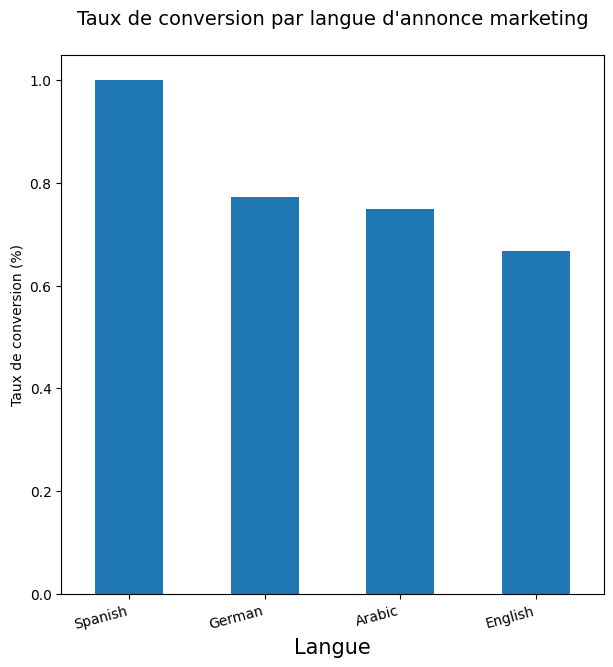

In [655]:
# Visualisation des resultats
plt.figure(figsize=(7, 7))

taux_retention_par_langue.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de conversion par langue d'annonce marketing\n", fontsize=14)

plt.xlabel('Langue', size = 15)

# Déplacer les étiquettes de l'axe X de façon oblique (rotation de 15 degrés et alignement à droite pour les étiquettes)
plt.xticks(rotation=15, ha='right')  # rotation de 15 degrés

plt.ylabel('Taux de conversion (%)')

plt.savefig('graph5.png')  # Enregistrer l'image
plt.show()
plt.close()

Les campagnes marketing en Allemand semblent être plus efficaces que celles dans les autres 
langues en termes de conversion des utilisateurs. 

#### Taux de conversion Journalier

In [656]:
# Calcul du taux de conversion journalier
taux_conv_journalier = conversion_rate(df, ['date_served'])


print(taux_conv_journalier)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


In [657]:
# Transformation du résultat en dataframe
taux_conv_journalier = pd.DataFrame(taux_conv_journalier.reset_index())

taux_conv_journalier.columns = ['data_subscribed', 'conversion_rate']

taux_conv_journalier.head()

,data_subscribed,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


Jusqu’à présent, nous avons calculé des taux de rétention et de reconversion en fonction d’une 
seule variable. Sachez qu’il est possible de considérer plus d’une variable.

#### Taux de conversion journalier par groupe d'âges

In [658]:
daily_conv_rate_age_group = conversion_rate(df, ['date_served', 'age_group'])

print(daily_conv_rate_age_group)

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


Transformons ces données en une dateframe

In [659]:
daily_conv_rate_age_group = pd.DataFrame(daily_conv_rate_age_group.unstack(level=1))

#level = 1 car c'est la varibale age_group(position 1) qu'on veut désemballer

# l'indexation dans python débute par 0

daily_conv_rate_age_group.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


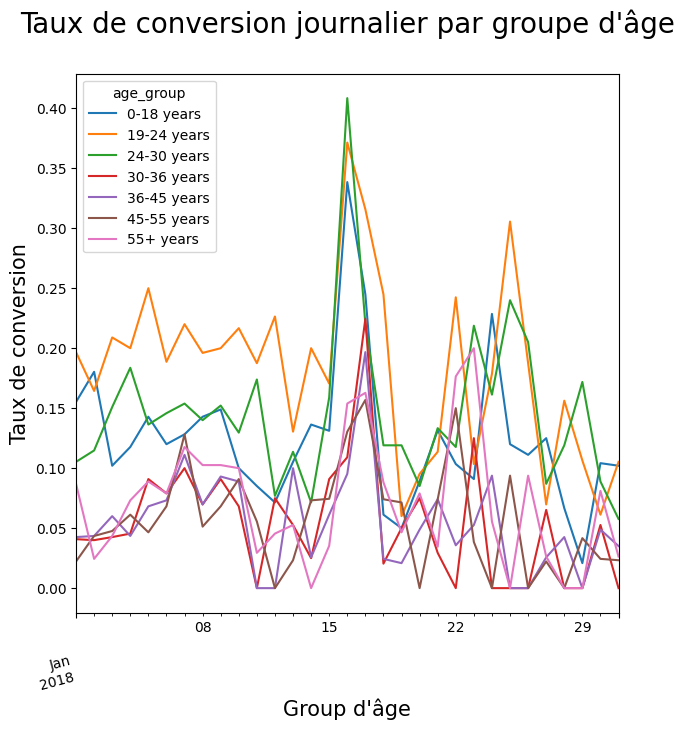

In [660]:
# Visualisation 

daily_conv_rate_age_group.plot(kind='line', figsize = (7,7))

plt.title("Taux de conversion journalier par groupe d'âge\n", size = 20)

plt.ylabel('Taux de conversion', size = 15)

plt.xlabel("Group d'âge", size = 15)

# Déplacer les étiquettes de l'axe X de façon oblique (rotation de 15 degrés et alignement à droite pour les étiquettes)
plt.xticks(rotation=15, ha='right')  # rotation de 15 degrés

plt.savefig('graph6.png')  # Enregistrer l'image
plt.show()
plt.close()

❖ TAUX DE CONVERSION JOURNALIER PAR CANAL MARKETING 

In [661]:
daily_conv_rate_canal = conversion_rate(df, ['date_served', 'marketing_channel']) 

daily_conv_rate_canal = pd.DataFrame(daily_conv_rate_canal.unstack(level=1)) 

daily_conv_rate_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.117647,0.084656,0.106667,0.083333
2018-01-02,1.0,0.098361,0.077982,0.129032,0.055556
2018-01-03,0.0,0.080645,0.088542,0.171875,0.083333
2018-01-04,0.5,0.138462,0.089820,0.126984,0.058824
2018-01-05,1.0,0.112903,0.126582,0.159420,0.027778


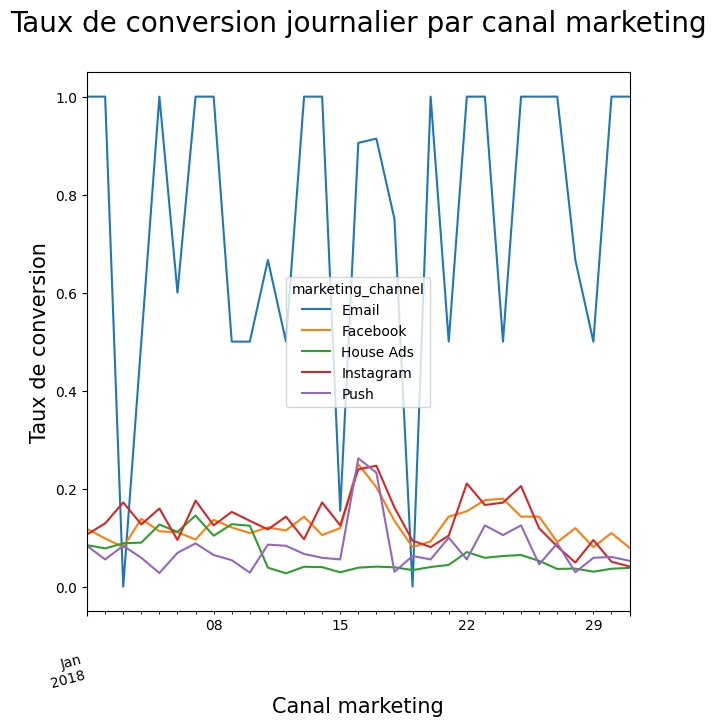

In [662]:
# Visualisation
daily_conv_rate_canal.plot(kind='line', figsize = (7, 7))

plt.title("Taux de conversion journalier par canal marketing\n", size = 20)

plt.ylabel('Taux de conversion', size = 15)

plt.xlabel("Canal marketing", size = 15)

# Déplacer les étiquettes de l'axe X de façon oblique (rotation de 15 degrés et alignement à droite pour les étiquettes)
plt.xticks(rotation=15, ha='right')  # rotation de 15 degrés

plt.savefig('graph7.png')  # Enregistrer l'image
plt.show()
plt.close()

❖ TAUX DE CONVERSION PAR JOUR DE SEMAINE ET PAR CANAL 
MARKETING 

Les utilisateurs sont -ils plus susceptibles de convertir le week-end par rapport aux autres jours 
de la semaine ? 

In [663]:
 # Colonne Jour de la semaine où l'annonce a été diffusée 

df['DoW_served'] = df['date_served'].dt.dayofweek 
 
# Taux de conversion par jour de la semaine et par canal marketing 
 
DoW_conversion = conversion_rate(df, ['DoW_served', 'marketing_channel']) 
 
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1)) 
 
DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


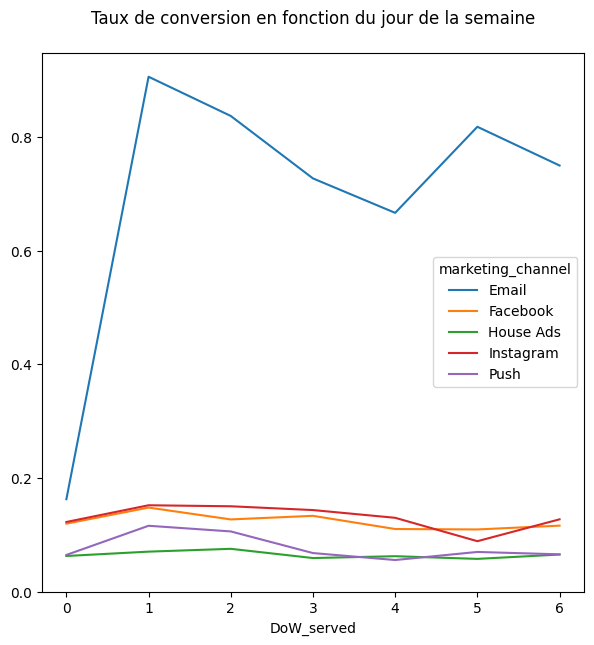

In [664]:
# Taux de conversion en fonction du jour de la semaine


DoW_df.plot(kind='line', figsize = (7, 7))

plt.title('Taux de conversion en fonction du jour de la semaine\n')

plt.ylim(0)

plt.savefig('graph8.png')  # Enregistrer l'image
plt.show()
plt.close()

Nous avons calculé les taux de conversion et de rétention pour divers segments ou combinaison 
de segments. Il y a d’autres types d’analyses que vous pouvez effectuer.

❖ PREFERENCES JOURNALIERES LINGUISTIQUES DES UTILISATEURS 


In [665]:
# Nombres d'utilisateurs pour chaque langue préférée à chaque date 
n_lang_per_date = df.groupby(['date_served', 'language_preferred'])['user_id'].nunique() 

print(n_lang_per_date) 

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64


In [666]:
# Transformation du résultat ci-dessus en une dataframe 
n_lang_per_date = pd.DataFrame(n_lang_per_date.unstack(level=1))  
#level=1 car c'est le deuxième index ('language_preferred') qu'on veut désempiler 

n_lang_per_date.head() 

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


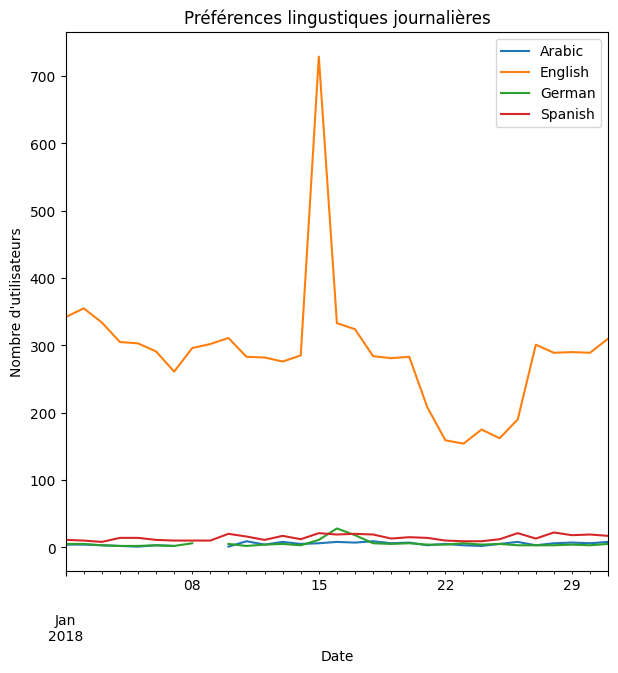

In [667]:
# Visualisation du résultat

n_lang_per_date.plot(figsize=(7, 7))

plt.title('Préférences lingustiques journalières')

plt.xlabel('Date')

plt.ylabel("Nombre d'utilisateurs")

plt.legend(loc = 'upper right', labels = n_lang_per_date.columns.values)

plt.savefig('graph9.png')  # Enregistrer l'image
plt.show()
plt.close()

Comme nous l'avions vu précédemment, la langue la plus populaire est de loin l'Anglais. 


#### Préferences lingustiques par groupe d'âge

In [668]:
# Nombre d'utilisateurs par groupe d'âges et langues préféréees

n_lang_per_date = df.groupby(['age_group', 'language_preferred'])['user_id'].nunique()

n_lang_per_date = pd.DataFrame(n_lang_per_date.unstack(level=1))

n_lang_per_date.head()

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39


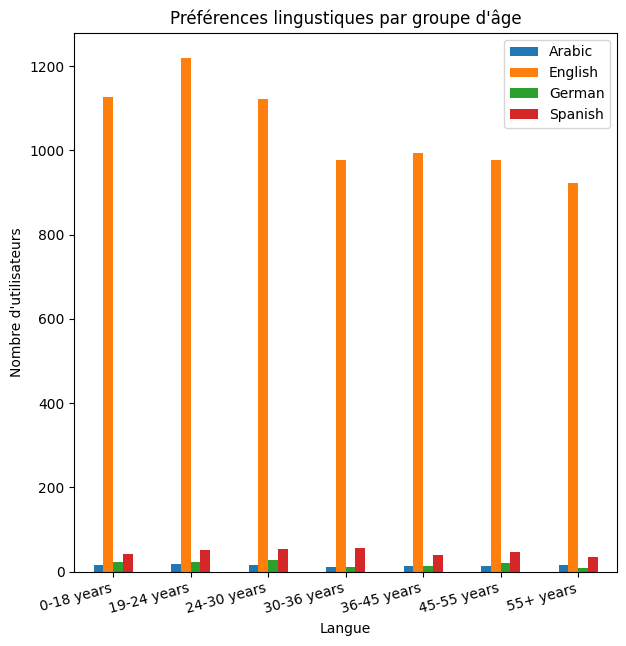

In [669]:
# Visualisation

n_lang_per_date.plot(kind='bar', figsize = (7, 7))

plt.title("Préférences lingustiques par groupe d'âge")

plt.xlabel("Langue")

plt.ylabel("Nombre d'utilisateurs")

# Déplacer les étiquettes de l'axe X de façon oblique
plt.xticks(rotation=15, ha='right')  # rotation de 45 degrés et alignement à droite pour les étiquettes


plt.legend(loc = 'upper right', labels = n_lang_per_date.columns.values)

plt.savefig('graph10.png')  # Enregistrer l'image
plt.show()
plt.close()

#### Cannaux marketing selon les groupes d'ages

Supposons que les décideurs de l'entreprise veulent savoir si les canaux marketing atteignent 
tous les utilisateurs de manière égale ou s'il y a une différence. Nous allons donc créer un 
graphique indiquant le nombre de personnes atteintes par chaque canal marketing par âge. 

In [670]:
# Nombre d'utilisateurs par groupe d'âges et canal d'acquisition

canal_age = df.groupby(['age_group', 'marketing_channel'])['user_id'].nunique()

canal_age = pd.DataFrame(canal_age.unstack(level=1))

canal_age.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


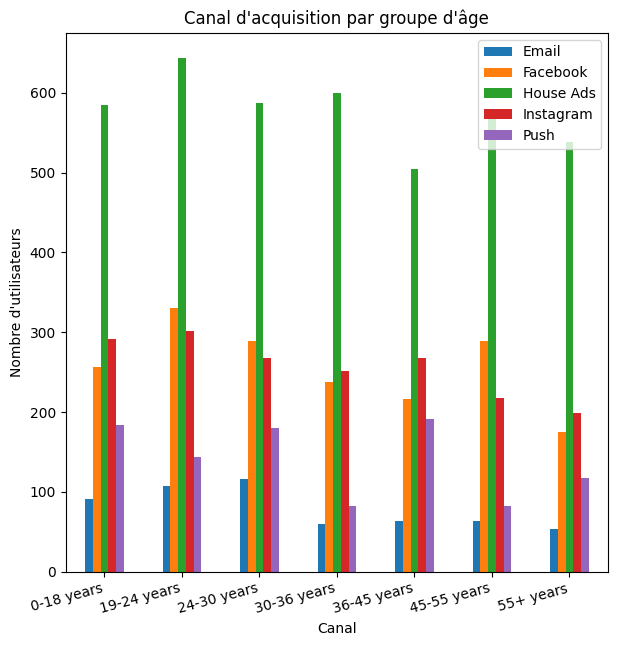

In [671]:
# Visualisation

canal_age.plot(kind='bar', figsize = (7, 7))

plt.title("Canal d'acquisition par groupe d'âge")

plt.xlabel("Canal")

plt.ylabel("Nombre d'utilisateurs")

plt.legend(loc = 'upper right', labels = canal_age.columns.values)

# Déplacer les étiquettes de l'axe X de façon oblique
plt.xticks(rotation=15, ha='right')  # rotation de 45 degrés et alignement à droite pour les étiquettes

plt.savefig('graph11.png')  # Enregistrer l'image
plt.show()
plt.close()

## Conclusion
Le Marketing est l'un des départements stratégiques les plus importants pour une entreprise.
Pouvoir analyser les données clients afin d'en tirer des informations utiles est une compétence hautement importante. Pandas est une librairie très puissante pour faire l'analyse des données avec Python.
A travers ce projet, nous avons utilisé quelques fonctionnalités de Pandas afin d'éffectuer une analyse descriptive de la campagne marketing d'une entreprise de services en ligne.

### Rapport automatisé - Projet : ANALYSE D’UNE CAMPAGNE MARKETING AVEC PANDAS

In [672]:
from fpdf import FPDF
from PIL import Image

# Créer un document PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Titre du PDF
pdf.set_font('Arial', 'B', 12)

text = "Rapport Automatisé - Projet de Data Science : Analyse d'une Campagne Marketing avec PANDAS"

# Remplacer les apostrophes typographiques et autres caractères problématiques
text = text.replace('’', "'").replace('“', '"').replace('”', '"')

pdf.cell(200, 10, txt= text, ln=True, align='C')

# Ajout de texte
pdf.set_font('Arial', '', 12)
pdf.ln(10)  # Nouvelle ligne
pdf.multi_cell(0, 10, txt="Voici un résumé des résultats obtenus pour le projet réalisé.")

# Initialiser la position verticale pour les images
y_position = 80  # Position de départ pour la première image (ajusté pour laisser un peu d'espace en haut)

# Liste des images à insérer
images = ['graph1.png', 'graph2.png', 'graph3.png', 'graph4.png', 'graph5.png', 
          'graph6.png', 'graph7.png', 'graph8.png', 'graph9.png', 'graph10.png','graph11.png']

# Largeur d'image fixe
image_width = 180

# Ajouter les images avec un espacement amélioré
for image in images:
    # Calculer la hauteur réelle de l'image
    img = Image.open(image)
    img_width, img_height = img.size
    
    # Calculer la nouvelle hauteur de l'image en fonction de la largeur
    aspect_ratio = img_height / img_width
    image_height = image_width * aspect_ratio

    # Ajouter un espacement entre les images
    if y_position + image_height > 270:  # Vérifie si l'image dépasse la page
        pdf.add_page()  # Ajouter une nouvelle page si nécessaire
        y_position = 20  # Réinitialiser la position à la première ligne de la nouvelle page
    
    # Ajouter l'image dans le PDF
    pdf.image(image, x=10, y=y_position, w=image_width, h=image_height)
    
    # Ajuster la position verticale pour la prochaine image
    y_position += image_height + 15  # Ajouter un espacement de 15 px après chaque image

# Sauvegarder le fichier PDF
pdf.output("rapport_automatique.pdf")


''